<a href="https://colab.research.google.com/github/patriciadorneles/data.science/blob/main/Analisando_os_Dados_do_Airbnb_(Italia_Roma).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by Patrícia Dorneles*

---


# Análise dos Dados do Airbnb - *Roma - Itália*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Roma, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados foram obtidos no site [Inside Airbnb.](http://insideairbnb.com/get-the-data///)

Para a análise exploratória inicial, serão usados apenas os dados do seguinte arquivo:
* `listings.csv` - *Summary information and metrics for listings in Rome (good for visualisations).*

In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame 
df = pd.read_csv("/content/listings.csv")

# Nova seção

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Análise dos Dados

Com as bibliotecas baixadas, podemos iniciar o projeto de análise de dados.
Nesta etapa, o objetivo é evidenciar as circunstâncias iniciais dos dados e promover o entendimento das informações.

**Dicionário das variáveis**

* `id` - número de id gerado para identificação do imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data da última avaliação
* `reviews_per_month` - quantidade de avaliações por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias disponíveis dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

**Dicionário das variáveis**


In [ ]:
# mostrar as 5 primeiras entradas
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,49955080,Singola al Casale di Gardenia,396326393,Alessia,NaN,XV Cassia/Flaminia,42.07605,12.32067,Private room,66,1,0,NaN,NaN,3,88,0,NaN
1,41146116,Il Giardino di Veio,322089651,Rosetta,NaN,XV Cassia/Flaminia,42.05088,12.45619,Private room,20,2,1,2020-01-26,0.03,1,0,0,NaN
2,39624404,CAMERA MATRIMONIALE STANDARD CON COLAZIONE INC...,304471512,Hotel,NaN,VI Roma delle Torri,41.82882,12.73900,Private room,100,1,0,NaN,NaN,1,180,0,NaN
3,1903817,Lovely apartment with fabulous view north of Rome,9883614,Eva,NaN,XV Cassia/Flaminia,42.13578,12.32621,Entire home/apt,110,3,53,2022-05-25,0.63,4,289,3,NaN
4,17617868,SUPER OFFERTA-stanza Maria-doppia o matrimoniale,97622372,Eleonora,NaN,XV Cassia/Flaminia,42.06512,12.46106,Private room,25,1,12,2022-05-17,0.19,3,315,3,16903


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

A quantidade de dados será identificada, junto com a visualização dos tipos de coluna.
É importante ressaltar que os dados retirados do site do Airbnb é a versão "resumida", para uma análise mais concisa.

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t{}".format(df.shape[0]))
print("Variáveis:\t{}".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	23911
Variáveis:	18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
É importante, em uma análise, saber a quantidade de valores ausentes, pois impactam diretamente na qualidade do *dataset*. Quanto menos valores ausentes, melhor é o *dataset* usado.


*   A variante `neighbourhood_group`  possui 100% de seus valores ausentes;
*   `license` possui 85% de seus valores nulos;


*   `reviews_per_month` e `last_review` possuem a mesma quantidade de valores ausentes, cerca de 16%;
*   As variantes `host_name`e `name` possuem menos de 3% de valores ausentes.







In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.852620
reviews_per_month                 0.164820
last_review                       0.164820
host_name                         0.000209
name                              0.000125
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para a identificação da distribuição das variáveis, usaremos um histograma.

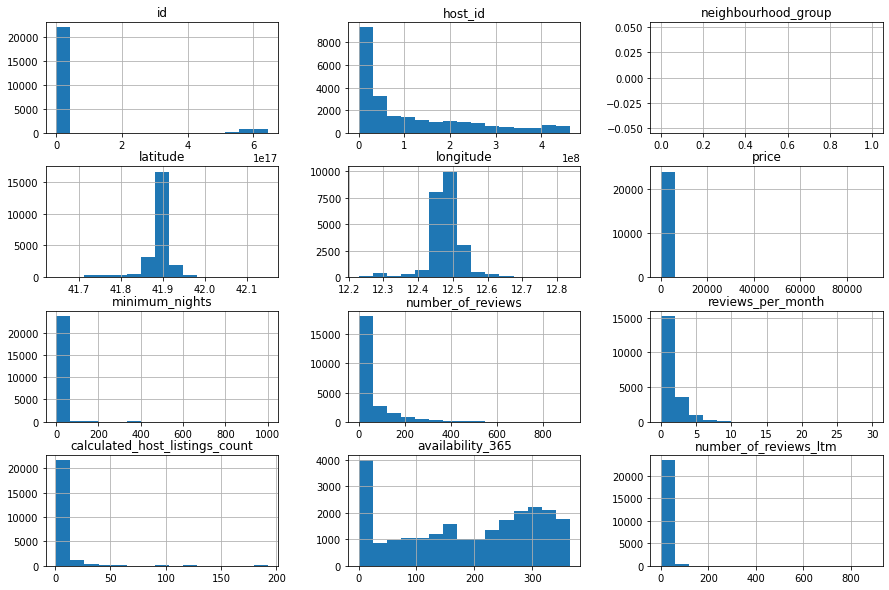

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

Utilizando o comando abaixo, é possível visualizar a média de preço para o aluguel por noite, independente da lozalização do imóvel dentro de Roma.

In [ ]:
# ver a média da coluna `price``
df.price.mean()

166.65810714733806

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa uma semelhança ou relação entre duas coisas, nesse caso, duas varriáveis.

Para a visualização da correlação entre as variáveis, serão usados uma matriz de correlação e um `heat map`. 

In [ ]:
# criar uma matriz de correlação
corr = df[['price',	'minimum_nights',	'number_of_reviews',	'last_review',	'reviews_per_month',	'calculated_host_listings_count',	'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.002710,-0.027109,-0.014006,0.030761,0.004872
minimum_nights,-0.002710,1.000000,-0.023117,-0.041683,-0.021922,0.005600
number_of_reviews,-0.027109,-0.023117,1.000000,0.571470,-0.050331,-0.001884
reviews_per_month,-0.014006,-0.041683,0.571470,1.000000,-0.002250,0.078357
calculated_host_listings_count,0.030761,-0.021922,-0.050331,-0.002250,1.000000,-0.038447
availability_365,0.004872,0.005600,-0.001884,0.078357,-0.038447,1.000000


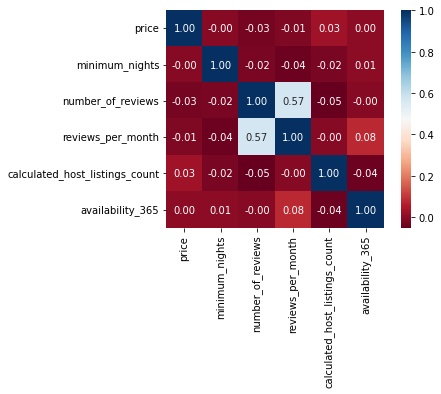

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr,cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Dentro do Airbnb existem diversos tipos de imóveis disponíveis para aluguel, como é exposto na variável `room_type`. Alguns exemplos são quartos individuais, quartos compartilhados, apartamentos inteiros etc.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    15816
Private room        7122
Hotel room           823
Shared room          150
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.661453
Private room       0.297855
Hotel room         0.034419
Shared room        0.006273
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**

Dentro de uma cidade turistica como Roma, é comum que os valores de aluguel tenham grandes variações de preço por bairro.

Para melhor visualização das variações, é usado `groupby()`, que irá fazer uma comparação entre os bairros da variável `neighbourhood`.



In [ ]:
# ver preços por bairros, na média
df.groupby(["neighbourhood"]).price.mean().sort_values(ascending=False)[:10]

neighbourhood
XI Arvalia/Portuense          315.661538
I Centro Storico              205.766725
II Parioli/Nomentano          146.295732
XIII Aurelia                  143.172439
XV Cassia/Flaminia            136.271222
IX Eur                        118.437870
VII San Giovanni/Cinecittà    102.632836
XII Monte Verde               100.791139
X Ostia/Acilia                 99.659446
VIII Appia Antica              93.783826
Name: price, dtype: float64

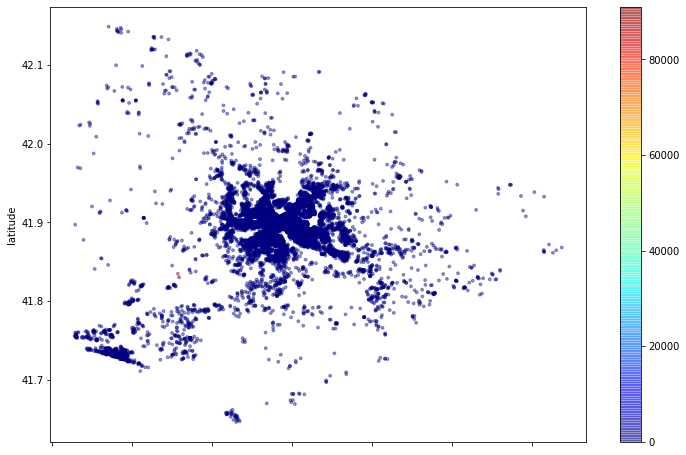

In [ ]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Os imóveis no Airbnb podem ser alugados por períodos variados. Existem proprietários que permitem o aluguel por meses, e outros que aceitam apenas alguns dias. Para visualizar a média do mínimo de noites para aluguel, será analisada a coluna `minimun_nights`.

In [ ]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()

3.6504537660490985

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém ficaram evidenciadas a existência de `outliers` e valores ausentes.

Também se notou a concentração de muitos imóveis em bairros próximos, quanto bairros um pouco mais distantes possuem uma quantidade muito pequena de propriedades para aluguel. Essa diferença pode atrapalhar as informações estatísticas em alguns atributos, causando distorções.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial.

Com o uso de informações mais "resumidas", a abordagem desta análide de dados foi feita de forma mais superficial. Para uma abordagem mais aprofundada, é recomendado o uso do conjunto de dados completo, disponivel em [Inside Airbnb.](http://insideairbnb.com/get-the-data/)

